<a href="https://colab.research.google.com/github/JustinWenzhaoLi/BasemapTutorial/blob/master/curve_fitting_harmonic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Prakrut Kansara and Wenzhao Li

Description: This code does the curve fitting for water inundation dataset from Sentinel. 

Date created: 7th November 2020

Date last modified: 9th November 2020

Version: 1.0.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import optimize

In [ ]:
# IF YOU NEED TO UPLOAD SOMETHING
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Inundated Pixels in Downstream Dam.csv to Inundated Pixels in Downstream Dam.csv
Saving Inundated Pixels in Upstream Dam.csv to Inundated Pixels in Upstream Dam.csv
Saving lake nasser.csv to lake nasser.csv
User uploaded file "Inundated Pixels in Downstream Dam.csv" with length 4788 bytes
User uploaded file "Inundated Pixels in Upstream Dam.csv" with length 5221 bytes
User uploaded file "lake nasser.csv" with length 4570 bytes


In [ ]:
upstream = pd.read_csv('Inundated Pixels in Upstream Dam.csv', thousands=',')
downstream = pd.read_csv('Inundated Pixels in Downstream Dam.csv', thousands=',')
sentinel = pd.read_csv('lake nasser.csv', thousands=',')

In [ ]:
upstream.index = upstream['system:time_start']
upstream.drop(columns='system:time_start',inplace=True)

downstream.index = downstream['system:time_start']
downstream.drop(columns='system:time_start',inplace=True)

sentinel.index = sentinel['system:time_start']
sentinel.drop(columns='system:time_start',inplace=True)

In [ ]:
upstream.index = pd.to_datetime(upstream.index)
downstream.index = pd.to_datetime(downstream.index)
sentinel.index = pd.to_datetime(sentinel.index)

In [ ]:
upstream_copy = upstream.reindex(pd.date_range(start='06-11-2017',end='10-17-2020',freq='1D'))
downstream_copy = downstream.reindex(pd.date_range(start='06-11-2017',end='10-17-2020',freq='1D'))
sentinel_copy = sentinel.reindex(pd.date_range(start='06-11-2017',end='10-17-2020',freq='1D'))

In [ ]:
upstream_copy.interpolate(method='linear',inplace=True)
downstream_copy.interpolate(method='linear',inplace=True)
sentinel_copy.interpolate(method='linear',inplace=True)

In [ ]:
upstream_copy.columns=['Observed']
downstream_copy.columns=['Observed']
sentinel_copy.columns=['Observed']

In [ ]:
train_data = sentinel_copy[:'06-11-2019']
train_data = train_data['Observed'].rolling(12,min_periods=1).mean()

In [ ]:
# def func(x, B0, B1, B2, B3, A, omega, phi):
#     return B0 + B1*x + B2*x*x + B3*x*x*x + A*np.cos(2*np.pi*(1/365)*x + (np.pi - (12*np.pi/365)))

In [ ]:
# Simple version only shown as:  a + bX + cf(x), no X^2 and X^3
def func(x, B0, B1,  A, omega, phi):
    return B0 + B1*x + A*np.cos(2*np.pi*(1/365)*x + (np.pi - (12*np.pi/365)))

In [ ]:
# # having issues
# def func(x, B0, B1,  A, omega, phi):
#     return B0 + B1*x + A*np.cos(2*np.pi*(1/365)*omega*x + phi))

SyntaxError: ignored

In [ ]:
x = np.array(range(1, len(train_data.index)+1))
params, params_covariance = optimize.curve_fit(func, x, train_data)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [ ]:
params

array([9.30669848e+03, 1.15670168e+01, 3.51534642e+03, 1.00000000e+00,
       1.00000000e+00])

In [ ]:
x_new = np.array(range(1, len(sentinel_copy.index)+1))

fit_curve = pd.DataFrame(func(x_new,params[0],params[1],params[2],params[3],params[4]), index=sentinel_copy.index)
fit_curve = fit_curve.reindex(pd.date_range(start='06-11-2017',end='10-17-2020',freq='1D'))
fit_curve.columns=['Fitted']

Text(0.03, 0.5, 'Number of Inundated pixels')

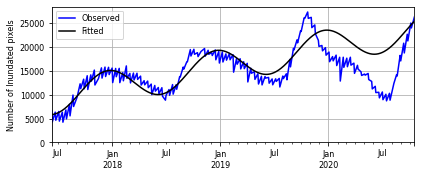

In [ ]:
plt.rc('font', size = 8)

fig,ax = plt.subplots(1,1,figsize=(6.5,2.5),sharex=True,sharey=True)
sentinel_copy.astype('float64').plot(ax=ax,color='blue')
fit_curve.plot(color='black',ax=ax)

ax.grid(True)

ax.set_ylim(bottom=0)

ax.set_xlabel(None)

fig.text(0.03, 0.5, 'Number of Inundated pixels', va='center', rotation='vertical')

In [ ]:
fig.savefig('lake_nasser.png',dpi=300)

In [ ]:
# rm 'lake_nasser.png'

In [ ]:
from google.colab import files
files.download('lake_nasser.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>